# Task
Analyze the `Exam_Score_Prediction.csv` dataset, build a predictive model for exam scores, and evaluate its performance.

## Load Data

### Subtask:
Load the `Exam_Score_Prediction.csv` file into a pandas DataFrame to begin the analysis.


**Reasoning**:
Load the data into a pandas DataFrame by importing pandas and reading the specified CSV file.



In [1]:
import pandas as pd

df = pd.read_csv('/content/Exam_Score_Prediction.csv')
print("Dataset loaded successfully.")
df.head()

Dataset loaded successfully.


,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


## Initial Data Overview

### Subtask:
Perform an initial inspection of the dataset by displaying the first few rows, checking data types, and summarizing its structure (number of rows and columns).


**Reasoning**:
To perform an initial inspection of the dataset, I will display the first few rows, check the data types, and summarize its structure using `df.head()`, `df.info()`, and `df.shape`.



In [2]:
print("First 5 rows of the DataFrame:")
print(df.head())

print("\nConcise summary of the DataFrame:")
df.info()

print("\nNumber of rows and columns:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

First 5 rows of the DataFrame:
   student_id  age  gender   course  study_hours  class_attendance  \
0           1   17    male  diploma         2.78              92.9   
1           2   23   other      bca         3.37              64.8   
2           3   22    male     b.sc         7.88              76.8   
3           4   20   other  diploma         0.67              48.4   
4           5   20  female  diploma         0.89              71.6   

  internet_access  sleep_hours sleep_quality   study_method facility_rating  \
0             yes          7.4          poor       coaching             low   
1             yes          4.6       average  online videos          medium   
2             yes          8.5          poor       coaching            high   
3             yes          5.8       average  online videos             low   
4             yes          9.8          poor       coaching             low   

  exam_difficulty  exam_score  
0            hard        58.9  
1        

## Identify Missing Values

### Subtask:
Check for any missing values across all columns and visualize their distribution to understand data completeness.


**Reasoning**:
To identify missing values, I will use `df.isnull().sum()` to count the number of missing values per column. If any missing values are found, I will then visualize their distribution using a seaborn heatmap to understand the data completeness visually.



In [3]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

if missing_values.sum() > 0:
    print("\nVisualizing missing values with a heatmap...")
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Distribution of Missing Values')
    plt.show()
else:
    print("\nNo missing values found in the dataset.")

Missing values per column:
Series([], dtype: int64)

No missing values found in the dataset.


## Descriptive Statistics and Distributions

### Subtask:
Generate descriptive statistics for numerical columns and visualize their distributions using histograms or box plots. Analyze unique values and counts for categorical columns to understand their spread.


**Reasoning**:
To start the descriptive statistics and distribution analysis, I will first separate the numerical and categorical columns from the DataFrame. Then, I will generate descriptive statistics for the numerical columns using the `.describe()` method to get an overview of their central tendency, dispersion, and shape.



In [4]:
import numpy as np

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()

print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

print("\nDescriptive statistics for numerical columns:")
print(df[numerical_cols].describe())

Numerical columns: ['student_id', 'age', 'study_hours', 'class_attendance', 'sleep_hours', 'exam_score']
Categorical columns: ['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']

Descriptive statistics for numerical columns:
         student_id           age   study_hours  class_attendance  \
count  20000.000000  20000.000000  20000.000000      20000.000000   
mean   10000.504600     20.473300      4.007604         70.017365   
std     5773.654959      2.284458      2.308313         17.282262   
min        1.000000     17.000000      0.080000         40.600000   
25%     5000.750000     18.000000      2.000000         55.100000   
50%    10000.500000     20.000000      4.040000         69.900000   
75%    15000.250000     22.000000      6.000000         85.000000   
max    20001.000000     24.000000      7.910000         99.400000   

       sleep_hours    exam_score  
count  20000.00000  20000.000000  
mean       7.00856     6

**Reasoning**:
To visualize the distributions of numerical columns, I will generate histograms for each numerical column, excluding 'student_id' as it's an identifier. This will provide insight into the data's spread, central tendency, and potential outliers.




Visualizing distributions of numerical columns (Histograms):


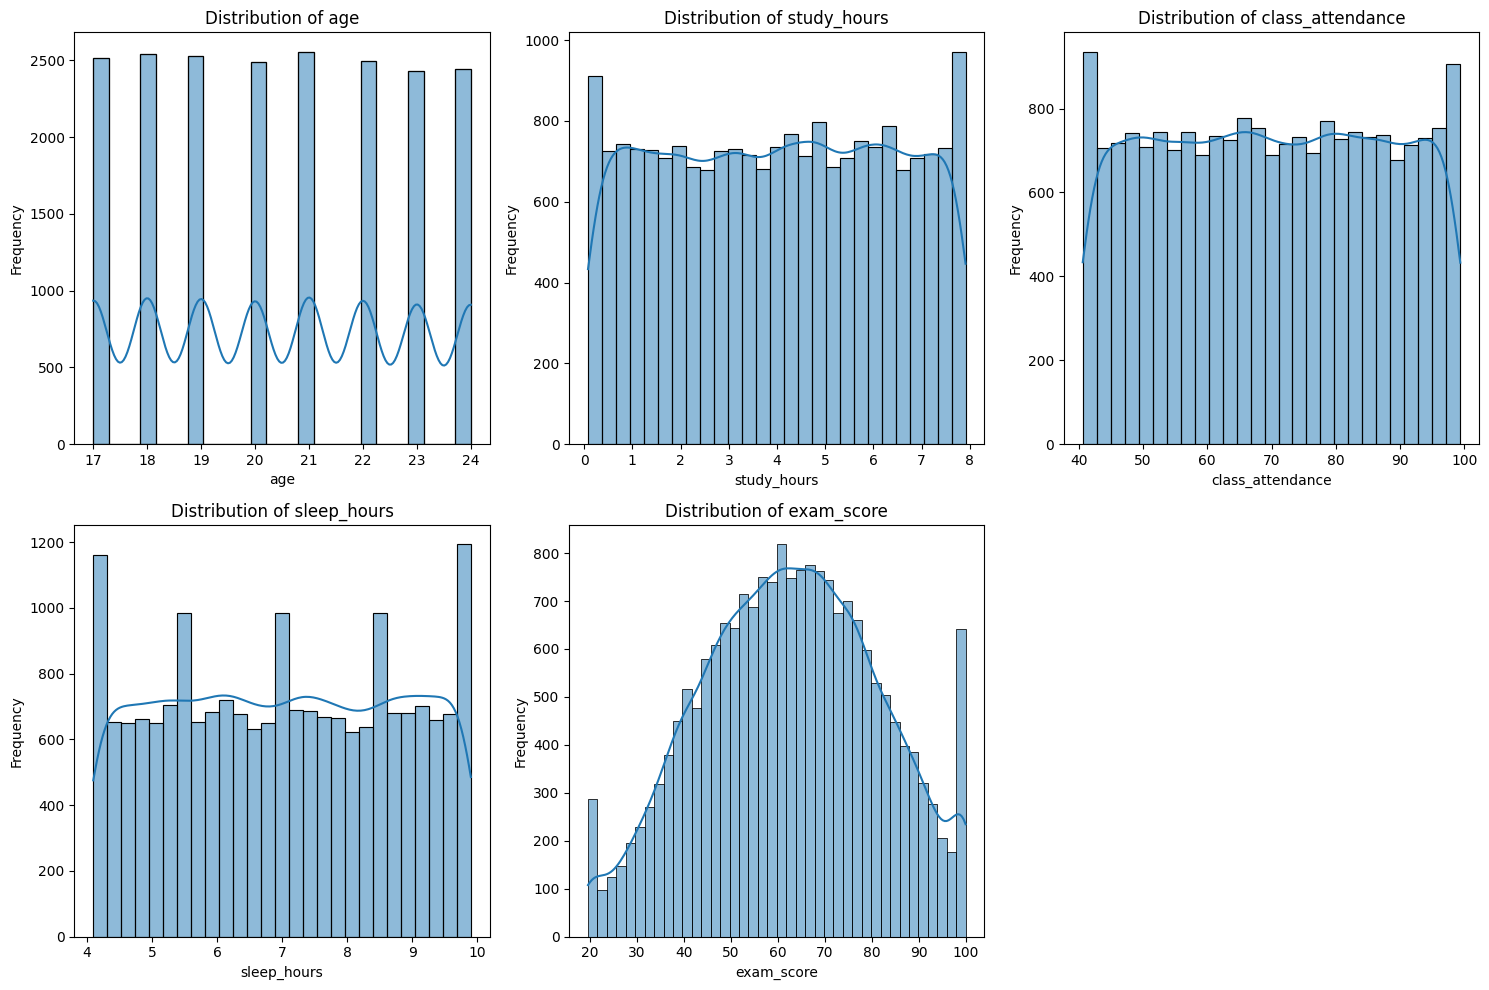

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distributions of numerical columns (histograms)
print("\nVisualizing distributions of numerical columns (Histograms):")

# Exclude 'student_id' from numerical columns for plotting as it is an identifier
numerical_cols_for_plot = [col for col in numerical_cols if col != 'student_id']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_for_plot):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid based on number of numerical columns
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**Reasoning**:
Now that numerical columns have been analyzed and visualized, I will proceed to analyze the categorical columns by calculating the count of unique values for each and then visualizing their distributions using count plots to understand their spread.




Unique values and counts for categorical columns:

Column: gender
gender
other     6726
male      6695
female    6579
Name: count, dtype: int64

Column: course
course
bca        2902
ba         2896
b.sc       2878
b.com      2864
bba        2836
diploma    2826
b.tech     2798
Name: count, dtype: int64

Column: internet_access
internet_access
yes    16988
no      3012
Name: count, dtype: int64

Column: sleep_quality
sleep_quality
average    6694
poor       6687
good       6619
Name: count, dtype: int64

Column: study_method
study_method
self-study       4079
online videos    4069
coaching         4036
group study      3922
mixed            3894
Name: count, dtype: int64

Column: facility_rating
facility_rating
medium    6760
low       6638
high      6602
Name: count, dtype: int64

Column: exam_difficulty
exam_difficulty
moderate    9878
easy        6141
hard        3981
Name: count, dtype: int64

Visualizing distributions of categorical columns (Count Plots):


/tmp/ipython-input-3665649426.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-3665649426.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-3665649426.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-3665649426.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `leg

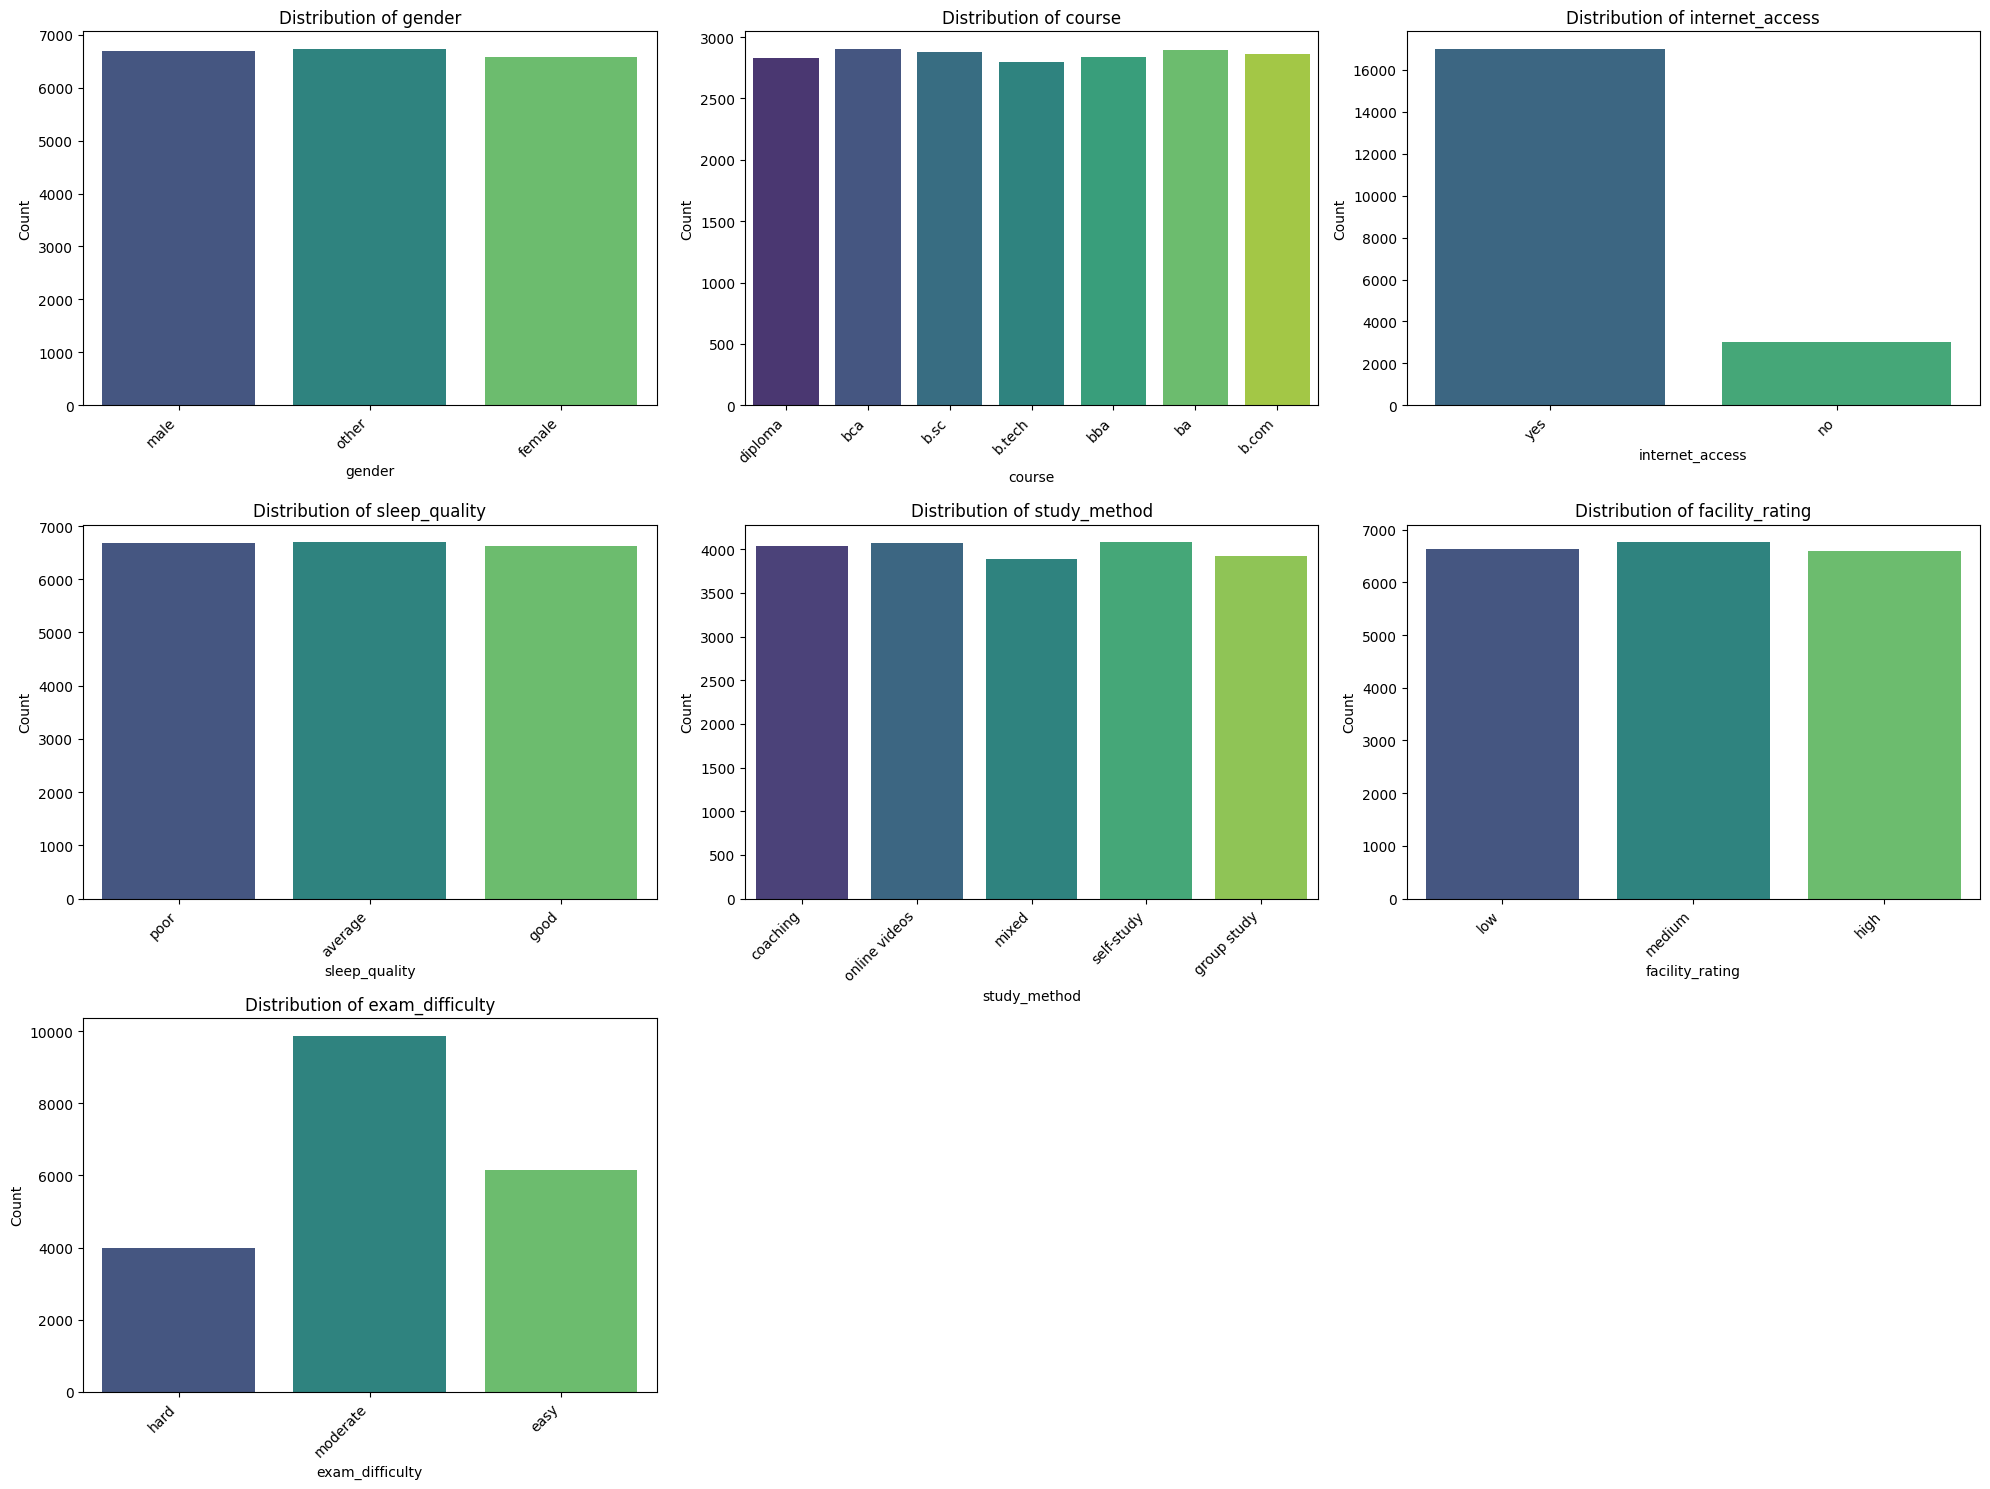

In [6]:
print("\nUnique values and counts for categorical columns:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())

print("\nVisualizing distributions of categorical columns (Count Plots):")

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid based on number of categorical columns
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code block generated a `FutureWarning` regarding the `palette` parameter in `sns.countplot` without specifying `hue`. To fix this, I will explicitly assign the `x` variable to `hue` and set `legend=False` as suggested by the warning, which will remove the warning while maintaining the intended visualization.




Unique values and counts for categorical columns:

Column: gender
gender
other     6726
male      6695
female    6579
Name: count, dtype: int64

Column: course
course
bca        2902
ba         2896
b.sc       2878
b.com      2864
bba        2836
diploma    2826
b.tech     2798
Name: count, dtype: int64

Column: internet_access
internet_access
yes    16988
no      3012
Name: count, dtype: int64

Column: sleep_quality
sleep_quality
average    6694
poor       6687
good       6619
Name: count, dtype: int64

Column: study_method
study_method
self-study       4079
online videos    4069
coaching         4036
group study      3922
mixed            3894
Name: count, dtype: int64

Column: facility_rating
facility_rating
medium    6760
low       6638
high      6602
Name: count, dtype: int64

Column: exam_difficulty
exam_difficulty
moderate    9878
easy        6141
hard        3981
Name: count, dtype: int64

Visualizing distributions of categorical columns (Count Plots):


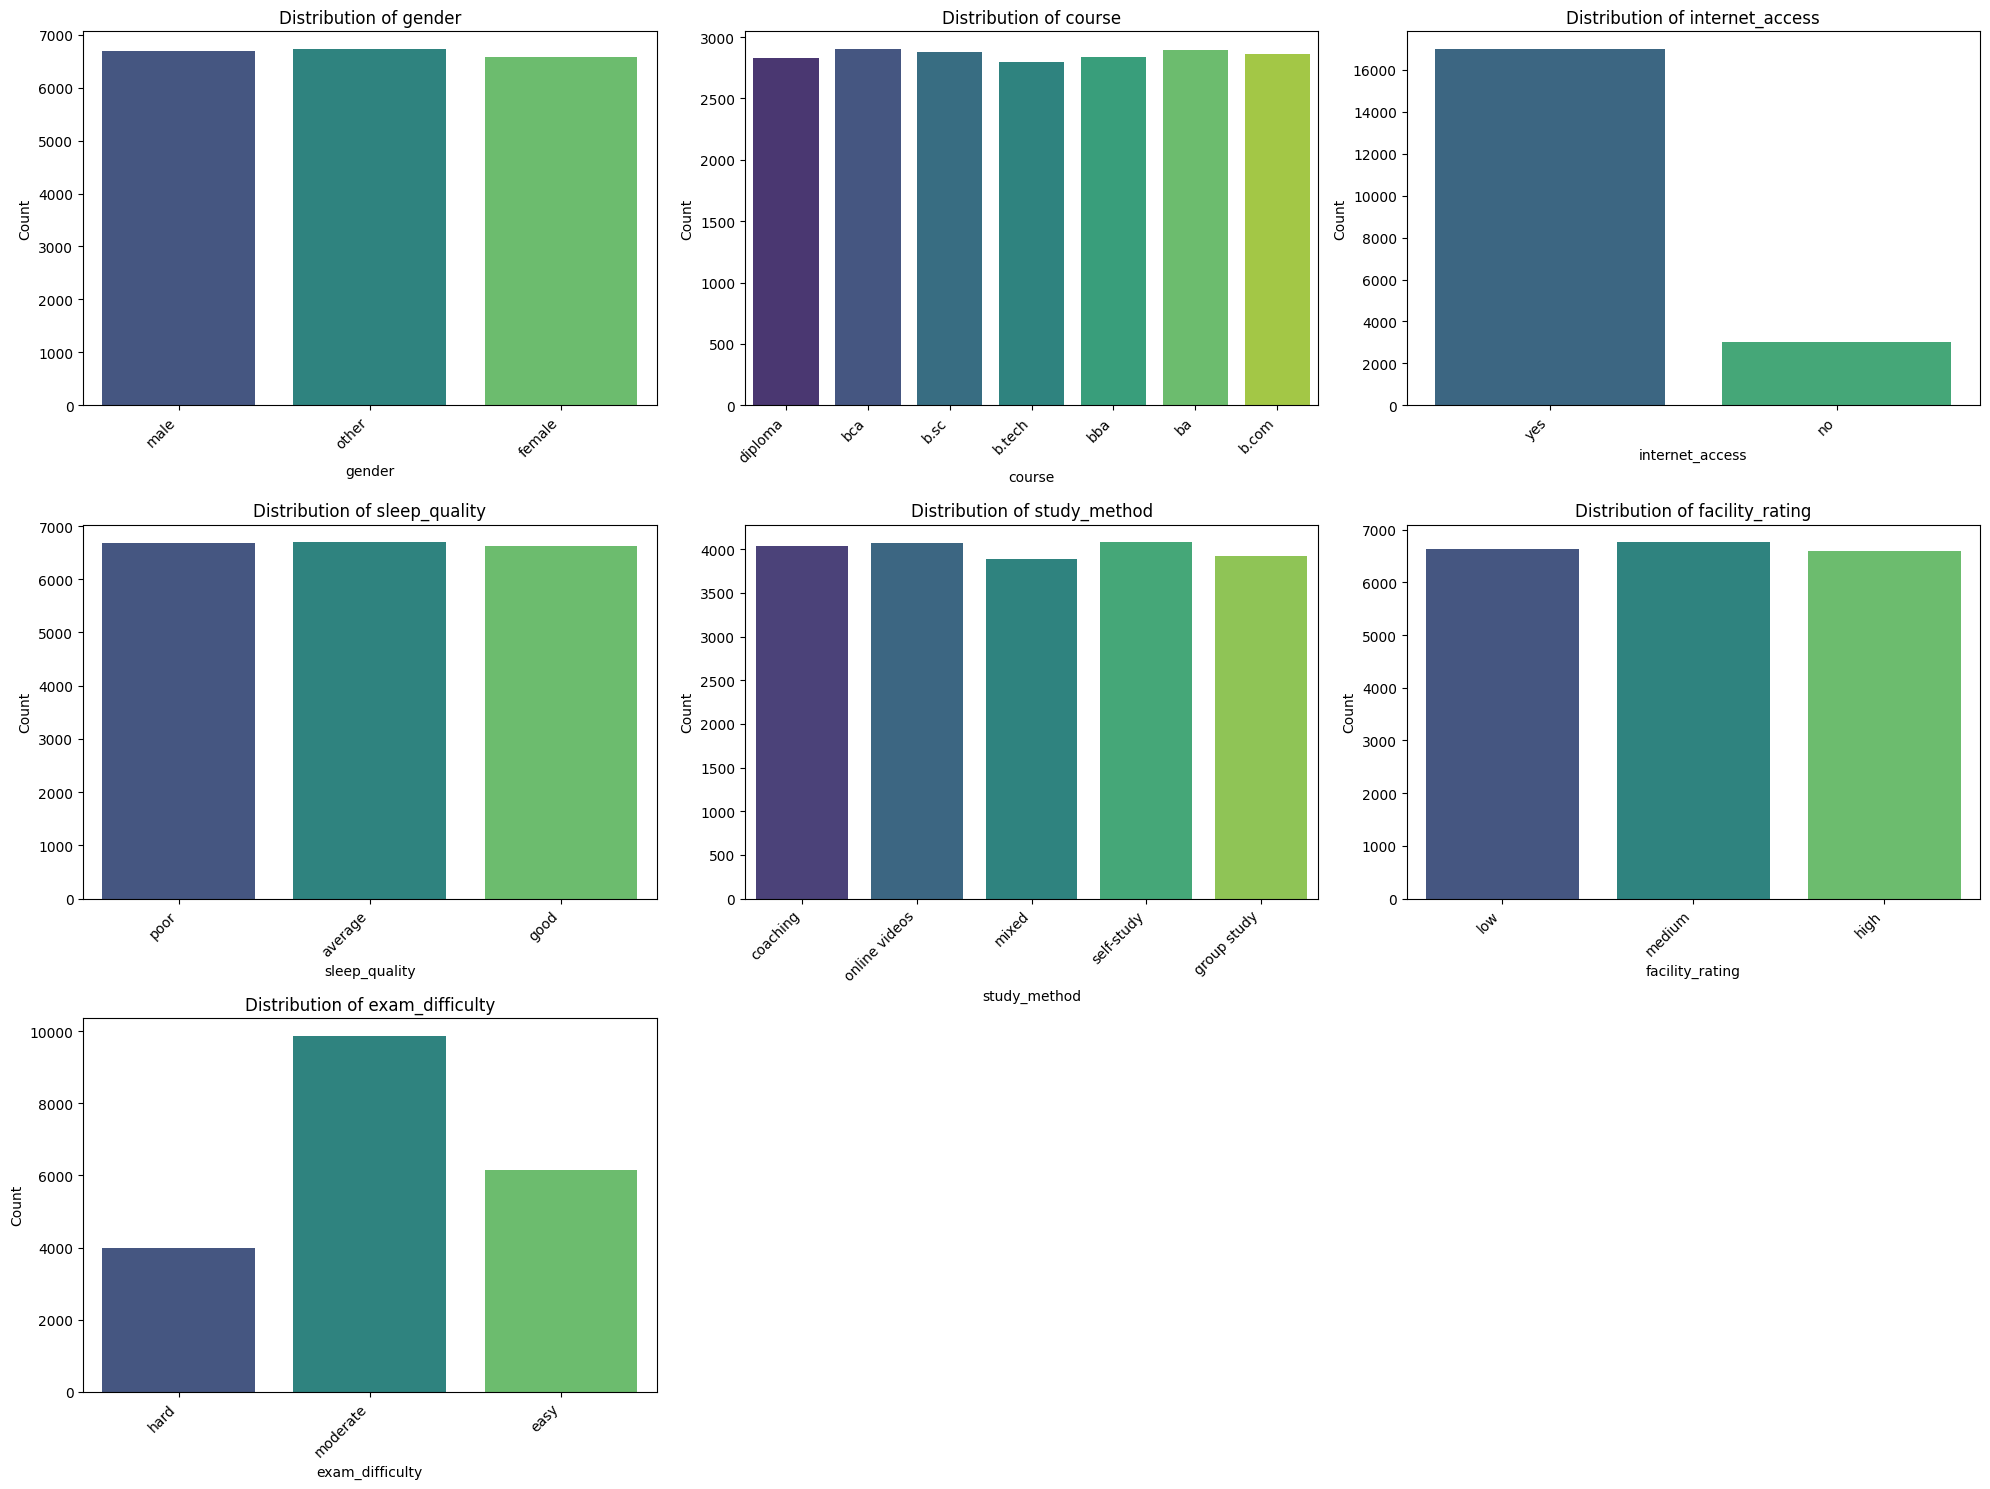

In [7]:
print("\nUnique values and counts for categorical columns:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())

print("\nVisualizing distributions of categorical columns (Count Plots):")

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid based on number of categorical columns
    sns.countplot(data=df, x=col, hue=col, palette='viridis', legend=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Correlation Analysis

### Subtask:
Calculate and visualize the correlation matrix between numerical features to understand relationships, especially with the target variable (exam scores).


**Reasoning**:
To analyze the correlation between numerical features, I will first calculate the correlation matrix for all numerical columns in the DataFrame. Then, I will print the correlations with the target variable, 'exam_score', to identify key relationships. Finally, I will visualize the entire correlation matrix using a heatmap for a comprehensive overview.



--- Correlation Analysis ---

Correlation Matrix:
                  student_id       age  study_hours  class_attendance  \
student_id          1.000000 -0.002574     0.002116          0.001128   
age                -0.002574  1.000000     0.002955          0.008449   
study_hours         0.002116  0.002955     1.000000         -0.001645   
class_attendance    0.001128  0.008449    -0.001645          1.000000   
sleep_hours        -0.000560 -0.000385    -0.004533          0.007187   
exam_score          0.003269  0.006522     0.717788          0.308850   

                  sleep_hours  exam_score  
student_id          -0.000560    0.003269  
age                 -0.000385    0.006522  
study_hours         -0.004533    0.717788  
class_attendance     0.007187    0.308850  
sleep_hours          1.000000    0.133222  
exam_score           0.133222    1.000000  

Correlations with 'exam_score':
exam_score          1.000000
study_hours         0.717788
class_attendance    0.308850
sleep_hour

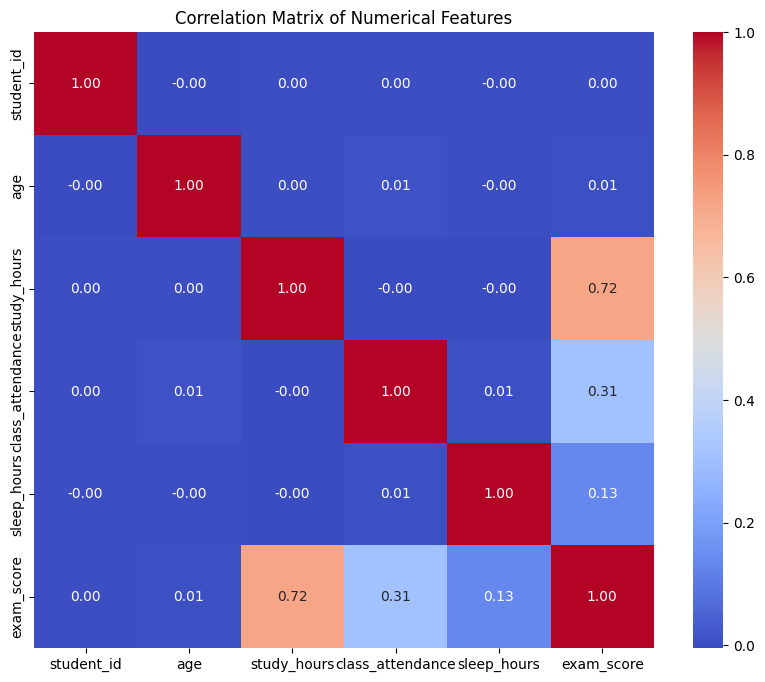

In [8]:
print('--- Correlation Analysis ---')

# Calculate the correlation matrix for numerical columns
correlation_matrix = df[numerical_cols].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Print correlations with 'exam_score'
print("\nCorrelations with 'exam_score':")
print(correlation_matrix['exam_score'].sort_values(ascending=False))

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Prepare Data for Modeling

### Subtask:
Select relevant features, preprocess categorical variables, and split the dataset into training and testing sets to prepare for building a predictive model.


**Reasoning**:
To prepare the data for modeling, I will first define the feature set (X) by selecting the relevant numerical columns ('study_hours', 'class_attendance', 'sleep_hours', 'age') and all categorical columns, explicitly excluding 'student_id'. Then, I will define the target variable (y) as the 'exam_score' column.



In [9]:
selected_numerical_features = ['study_hours', 'class_attendance', 'sleep_hours', 'age']

X_numerical = df[selected_numerical_features]
X_categorical = df[categorical_cols]
y = df['exam_score']

print("Defined features (X) and target (y).")
print(f"X_numerical shape: {X_numerical.shape}")
print(f"X_categorical shape: {X_categorical.shape}")
print(f"y shape: {y.shape}")

Defined features (X) and target (y).
X_numerical shape: (20000, 4)
X_categorical shape: (20000, 7)
y shape: (20000,)


**Reasoning**:
To preprocess the categorical variables, I will apply one-hot encoding to `X_categorical` using `pd.get_dummies` and then concatenate the resulting one-hot encoded DataFrame with the numerical features (`X_numerical`) to create the final feature set `X`.



In [10]:
X_categorical_encoded = pd.get_dummies(X_categorical, drop_first=True)

X = pd.concat([X_numerical, X_categorical_encoded], axis=1)

print("Categorical features one-hot encoded and combined with numerical features.")
print(f"Final features (X) shape: {X.shape}")
print("First 5 rows of the combined feature set:")
print(X.head())

Categorical features one-hot encoded and combined with numerical features.
Final features (X) shape: (20000, 23)
First 5 rows of the combined feature set:
   study_hours  class_attendance  sleep_hours  age  gender_male  gender_other  \
0         2.78              92.9          7.4   17         True         False   
1         3.37              64.8          4.6   23        False          True   
2         7.88              76.8          8.5   22         True         False   
3         0.67              48.4          5.8   20        False          True   
4         0.89              71.6          9.8   20        False         False   

   course_b.sc  course_b.tech  course_ba  course_bba  ...  sleep_quality_good  \
0        False          False      False       False  ...               False   
1        False          False      False       False  ...               False   
2         True          False      False       False  ...               False   
3        False          False     

**Reasoning**:
To complete the data preparation for modeling, I will split the combined feature set (X) and the target variable (y) into training and testing sets using `train_test_split` with an 80/20 ratio and a `random_state` for reproducibility.



In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets.
X_train shape: (16000, 23)
X_test shape: (4000, 23)
y_train shape: (16000,)
y_test shape: (4000,)


## Build and Train Predictive Model

### Subtask:
Build and train a regression model (e.g., Linear Regression or RandomForestRegressor) to predict exam scores based on the prepared features.


**Reasoning**:
To begin building the predictive model, I will import the `LinearRegression` model, instantiate it, train it on the training data, and then make predictions on the test set.



In [12]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_reg_model = LinearRegression()

# Train the model
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_reg_model.predict(X_test)

print("Linear Regression model trained and predictions made.")

Linear Regression model trained and predictions made.


## Evaluate Model Performance

### Subtask:
Evaluate the trained model's performance using appropriate metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared. Visualize the predicted scores against the actual scores to assess accuracy.


**Reasoning**:
To evaluate the trained model's performance, I will import the necessary metrics from `sklearn.metrics`, calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) score, and then print these metrics. I will also prepare for the visualization step by importing `matplotlib.pyplot` and `seaborn`.



Mean Absolute Error (MAE): 7.86
Mean Squared Error (MSE): 95.50
Root Mean Squared Error (RMSE): 9.77
R-squared (R2): 0.73


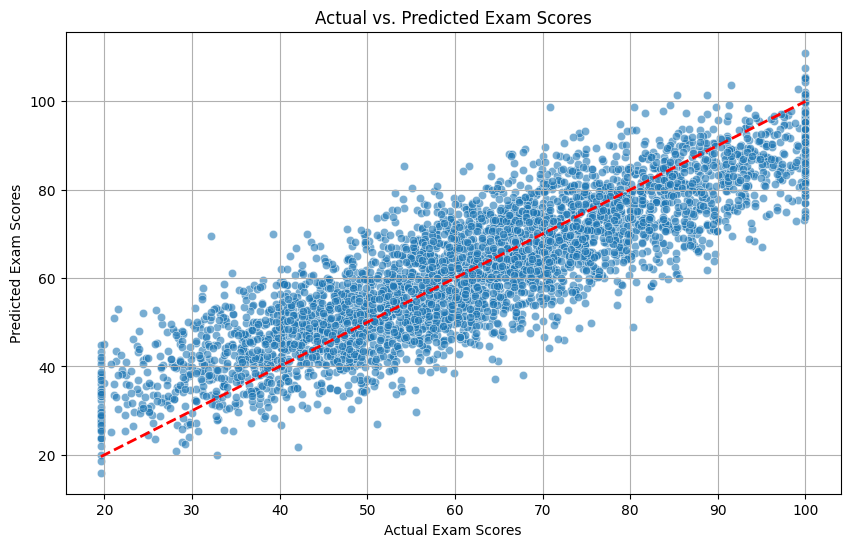

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualize predicted vs. actual scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Actual vs. Predicted Exam Scores')
plt.grid(True)
plt.show()

## Final Task

### Subtask:
Summarize the key findings from the data analysis, discuss the performance of the predictive model, and provide insights into factors influencing exam scores.


## Summary:

### Q&A
*   **Summarize the key findings from the data analysis.**
    The dataset contains 20,000 entries and 13 columns with no missing values. Key numerical features include `study_hours`, `class_attendance`, `sleep_hours`, `age`, and the target `exam_score`. Categorical features include `gender`, `course`, `internet_access`, `sleep_quality`, `study_method`, `facility_rating`, and `exam_difficulty`. The average exam score is 62.51, with `study_hours` and `class_attendance` showing the strongest positive correlations with `exam_score` (0.72 and 0.31 respectively).
*   **Discuss the performance of the predictive model.**
    A Linear Regression model was trained to predict exam scores. It achieved a Mean Absolute Error (MAE) of 7.86, meaning, on average, the model's predictions were off by about 7.86 points. The R-squared value is 0.73, indicating that the model explains approximately 73% of the variance in exam scores. This suggests a reasonably good fit, though there is still a significant portion of variance unexplained.
*   **Provide insights into factors influencing exam scores.**
    The analysis reveals that `study_hours` is the most significant positive predictor of exam scores, with a strong correlation of 0.72. `class_attendance` also positively influences scores (correlation of 0.31). `sleep_hours` show a weak positive correlation (0.13), implying some benefit but less impact than study time or attendance. `age` has negligible impact. While not directly quantified by correlation for categorical features, the model implicitly uses `internet_access`, `sleep_quality`, `study_method`, `facility_rating`, and `exam_difficulty` as influencing factors, with `exam_difficulty` having varied distributions that could impact scores.

### Data Analysis Key Findings
*   The dataset consists of 20,000 entries and 13 columns, with no missing values.
*   Numerical features include `student_id`, `age`, `study_hours`, `class_attendance`, `sleep_hours`, and `exam_score`. Categorical features include `gender`, `course`, `internet_access`, `sleep_quality`, `study_method`, `facility_rating`, and `exam_difficulty`.
*   The average `exam_score` is 62.51, ranging from 19.599 to 100.
*   `study_hours` show a strong positive correlation of 0.72 with `exam_score`.
*   `class_attendance` shows a moderate positive correlation of 0.31 with `exam_score`.
*   `sleep_hours` show a weak positive correlation of 0.13 with `exam_score`. `age` and `student_id` have negligible correlation with `exam_score`.
*   The `internet_access` distribution is heavily skewed, with 16,988 entries having access compared to 3,012 without.
*   `exam_difficulty` is predominantly 'moderate' (9,878 entries), followed by 'easy' (6,141) and 'hard' (3,981).
*   The Linear Regression model achieved an R-squared of 0.73, a Mean Absolute Error (MAE) of 7.86, a Mean Squared Error (MSE) of 95.50, and a Root Mean Squared Error (RMSE) of 9.77.

### Insights or Next Steps
*   **Focus on Core Predictors:** Given the strong positive correlations, students should be encouraged to increase `study_hours` and maintain high `class_attendance` as these are the most impactful factors identified for improving exam scores.
*   **Explore Non-Linear Relationships and Other Models:** While the current Linear Regression model explains 73% of the variance, exploring non-linear relationships or using more complex models (e.g., Random Forest, Gradient Boosting) could potentially capture additional variance and improve prediction accuracy further.
